In [1]:
import pandas as pd
import os
import seaborn as sns
sns.set_palette("viridis")

OUTPUT_DIR = "/opt/ml/output"
BINS = [-0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.001]
LABELS=['l0', 'l1', 'l2', 'l3', 'm4', 'm5', 'm6', 'h7', 'h8', 'h9']

In [2]:
def check_answer_range(out_file_name):
    result_df = pd.read_csv(out_file_name)
    bins = [-0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.001]
    results = pd.cut(result_df['prediction'], bins=BINS, labels=LABELS)
    
    ranges = results.value_counts().to_dict()
    # print(ranges)
    sns.barplot(x=LABELS, y=[ranges[label] for label in LABELS])
    
    return ranges

{'h7': 158,
 'm6': 153,
 'm5': 115,
 'l2': 98,
 'm4': 91,
 'l3': 67,
 'l1': 61,
 'h8': 1,
 'l0': 0,
 'h9': 0}

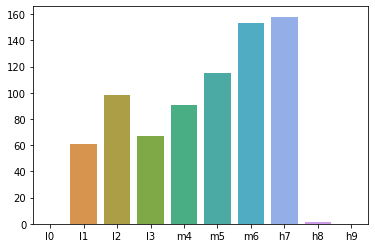

In [3]:
check_answer_range('fold_0-output.csv')

{'m6': 145,
 'h7': 128,
 'l1': 107,
 'm5': 99,
 'm4': 95,
 'l2': 88,
 'l3': 82,
 'l0': 0,
 'h8': 0,
 'h9': 0}

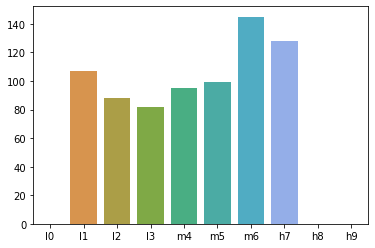

In [4]:
check_answer_range('fold_1-output.csv')

{'m6': 144,
 'm5': 132,
 'l2': 112,
 'h7': 103,
 'l3': 93,
 'm4': 91,
 'l1': 69,
 'l0': 0,
 'h8': 0,
 'h9': 0}

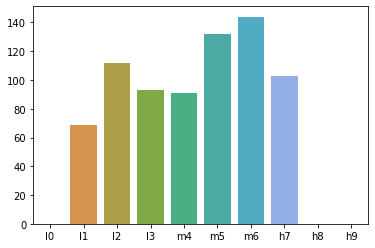

In [5]:
check_answer_range('fold_2-output.csv')

{'l1': 144,
 'm5': 129,
 'm4': 123,
 'm6': 123,
 'l2': 114,
 'l3': 107,
 'h7': 4,
 'l0': 0,
 'h8': 0,
 'h9': 0}

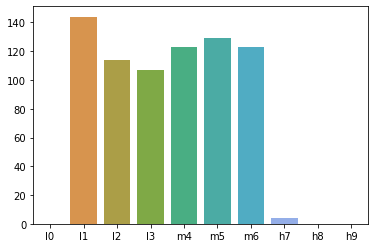

In [6]:
check_answer_range('fold_3-output.csv')

{'m6': 171,
 'm5': 123,
 'l2': 112,
 'm4': 101,
 'l3': 100,
 'l1': 71,
 'h7': 66,
 'l0': 0,
 'h8': 0,
 'h9': 0}

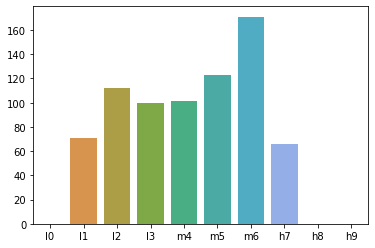

In [7]:
check_answer_range('fold_4-output.csv')

In [8]:
result = pd.DataFrame(columns=["id","prediction"])
for i in range(5):
    df = pd.read_csv(f"fold_{i}-output.csv")
    if i == 0:
        result["prediction"] = (df["prediction"] / 5)
    else:
        result["prediction"] += (df["prediction"] / 5)

result


,id,prediction
0,NaN,0.591044
1,NaN,0.590525
2,NaN,0.305643
3,NaN,0.715132
4,NaN,0.475073
...,...,...
739,NaN,0.207192
740,NaN,0.336165
741,NaN,0.353039
742,NaN,0.304231


In [9]:
result.to_csv("outoffold.csv")

{'m6': 149,
 'm5': 130,
 'l3': 99,
 'l2': 98,
 'm4': 98,
 'l1': 88,
 'h7': 82,
 'l0': 0,
 'h8': 0,
 'h9': 0}

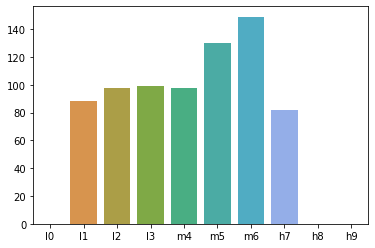

In [10]:
check_answer_range('outoffold.csv')